Auteur : Antoine Chesnais  
Date dernière version : 28/10/2019  
Description : Ce notebook contient l'assemblage des données Olist en un dataset customer / products   
Librairies utilisées : Pandas, Numpy, Matplolib, Seaborn

Ce notebook permet l'assemblage des différentes databases Olist en une seule, aggrégeant les données au niveau du client et donnant des informations au niveau des catégories de produits commandés. Une succinte EDA est effectuée à chaque chargement d'un set de données pour mieux l'appréhender, mais celle ci est moins complète que dans le notebook ‘Assemblage_consumer_order’, il est préférable de se référer à cette dernière.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chargement des données</a></span><ul class="toc-item"><li><span><a href="#Géolocalisation" data-toc-modified-id="Géolocalisation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Géolocalisation</a></span></li><li><span><a href="#Clients-:" data-toc-modified-id="Clients-:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Clients :</a></span></li><li><span><a href="#Vendeurs-:" data-toc-modified-id="Vendeurs-:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Vendeurs :</a></span></li><li><span><a href="#Objets-commandés-:" data-toc-modified-id="Objets-commandés-:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Objets commandés :</a></span></li><li><span><a href="#Description-produit" data-toc-modified-id="Description-produit-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Description produit</a></span></li><li><span><a href="#Traduction-catégorie-produit" data-toc-modified-id="Traduction-catégorie-produit-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Traduction catégorie produit</a></span></li><li><span><a href="#Commandes" data-toc-modified-id="Commandes-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Commandes</a></span></li><li><span><a href="#Paiements" data-toc-modified-id="Paiements-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Paiements</a></span></li><li><span><a href="#Commentaires" data-toc-modified-id="Commentaires-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Commentaires</a></span></li></ul></li><li><span><a href="#Création-BDD-clients-/-produits" data-toc-modified-id="Création-BDD-clients-/-produits-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Création BDD clients / produits</a></span><ul class="toc-item"><li><span><a href="#Assemblage-commandes-et-clients" data-toc-modified-id="Assemblage-commandes-et-clients-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Assemblage commandes et clients</a></span></li><li><span><a href="#Assemblage-objets-commandés-et-données-produits" data-toc-modified-id="Assemblage-objets-commandés-et-données-produits-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Assemblage objets commandés et données produits</a></span></li><li><span><a href="#Assemblage-global-comandes-/-produits" data-toc-modified-id="Assemblage-global-comandes-/-produits-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Assemblage global comandes / produits</a></span></li><li><span><a href="#Sélection-de-features" data-toc-modified-id="Sélection-de-features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sélection de features</a></span></li><li><span><a href="#Aggréagation-au-niveau-du-client" data-toc-modified-id="Aggréagation-au-niveau-du-client-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Aggréagation au niveau du client</a></span></li><li><span><a href="#Enregistrement-du-dataset" data-toc-modified-id="Enregistrement-du-dataset-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Enregistrement du dataset</a></span></li></ul></li></ul></div>

In [96]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Chargement des données

## Géolocalisation

In [97]:
data_geo = pd.read_csv('olist_geolocation_dataset.csv')
print(data_geo.shape)
display(data_geo.head())

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Clients :

In [98]:
data_customers = pd.read_csv('olist_customers_dataset.csv')
print(data_customers.shape)
display(data_customers.head())

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [99]:
print(data_customers['customer_id'].value_counts().describe())

count    99441.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: customer_id, dtype: float64


In [100]:
print(data_customers['customer_unique_id'].value_counts().describe())

count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: customer_unique_id, dtype: float64


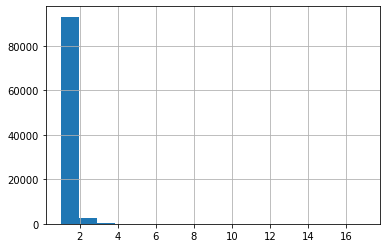

In [101]:
data_customers['customer_unique_id'].value_counts().hist(bins=17)

Attention : 'customer id' est unique pour chaque commande, il faut utiliser 'customer_unique_id' pour se référer au client  
Au final une majorité des clients n'a passé qu'une seule commande

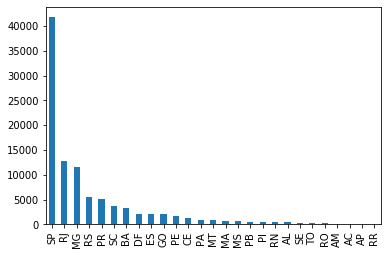

In [102]:
data_customers['customer_state'].value_counts().plot.bar()

## Vendeurs :

In [103]:
data_sellers = pd.read_csv('olist_sellers_dataset.csv')
print(data_sellers.shape)
display(data_sellers.head())

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


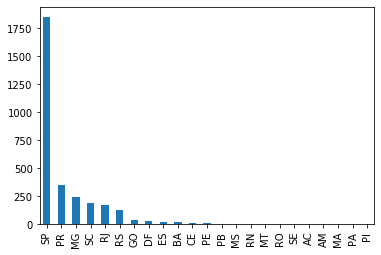

In [104]:
data_sellers['seller_state'].value_counts().plot.bar()

## Objets commandés :

In [105]:
data_order_items = pd.read_csv('olist_order_items_dataset.csv')
print(data_order_items.shape)
display(data_order_items.head())

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [106]:
display(data_order_items.loc[data_order_items['order_id']=='8272b63d03f5f79c56e9e4120aec44ef'])

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [107]:
data_order_items.drop(labels=['order_item_id','shipping_limit_date'], axis=1, inplace=True)

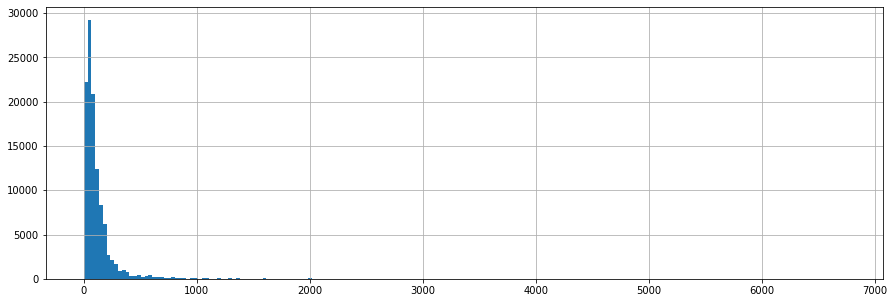

In [108]:
data_order_items['price'].hist(bins=200, figsize=(15,5))

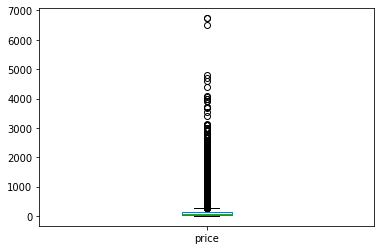

In [109]:
data_order_items['price'].plot.box()

In [110]:
data_order_items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

## Description produit

In [111]:
data_products = pd.read_csv('olist_products_dataset.csv')
print(data_products.shape)
display(data_products.head())

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [112]:
data_products.drop(labels=['product_weight_g','product_length_cm','product_height_cm','product_width_cm',
                           'product_name_lenght', 'product_description_lenght','product_photos_qty'], 
                   axis=1, inplace=True)

## Traduction catégorie produit

In [113]:
data_trad = pd.read_csv('product_category_name_translation.csv')
print(data_trad.shape)
display(data_trad.head())

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [114]:
data_products = data_products.merge(right=data_trad, how='left', on='product_category_name')
print(data_products.shape)
display(data_products.head())
data_products.drop(labels=['product_category_name'], axis=1, inplace=True)

(32951, 3)


,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


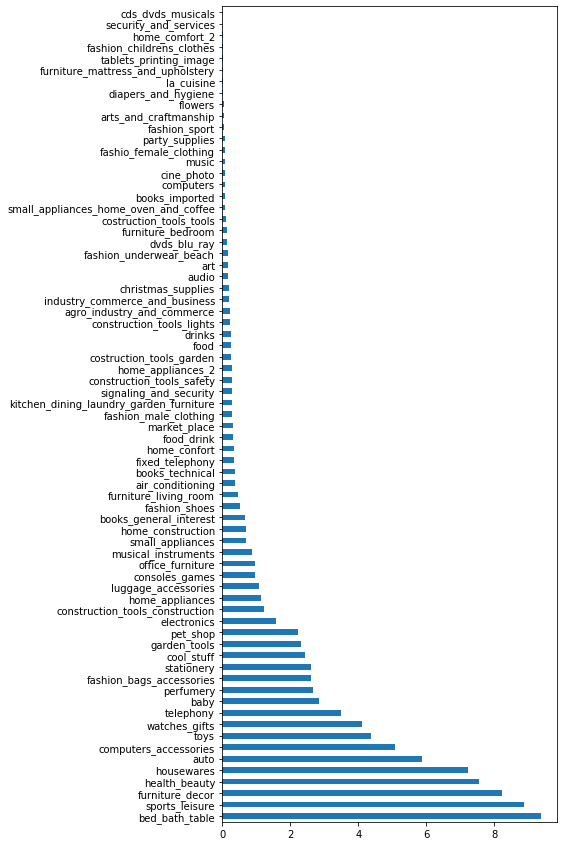

In [115]:
volume_products = data_products['product_category_name_english'].value_counts()
volume_products = volume_products / volume_products.sum() * 100
volume_products.plot.barh(figsize=(6,15))

A diviser en 5 grandes catégories ?

## Commandes

In [116]:
data_orders = pd.read_csv('olist_orders_dataset.csv')
print(data_orders.shape)
display(data_orders.head())

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [117]:
data_orders.drop(labels=['order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date'], 
                 axis=1, inplace=True)

In [118]:
data_orders.order_purchase_timestamp =  pd.to_datetime(data_orders.order_purchase_timestamp, 
                                                       format = '%Y/%m/%d %H:%M:%S')

In [119]:
monthly_view = data_orders['order_purchase_timestamp'].dt.to_period('M')

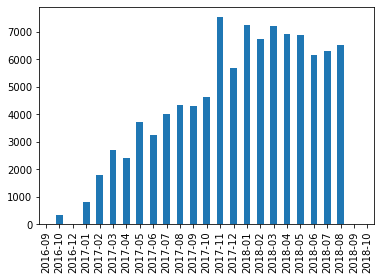

In [120]:
monthly_view.value_counts().sort_index().plot.bar()

## Paiements

In [121]:
data_payments = pd.read_csv('olist_order_payments_dataset.csv')
print(data_payments.shape)
display(data_payments.head())

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Attention : plus de paiements que de commandes !

In [122]:
data_payments['payment_installments'].describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

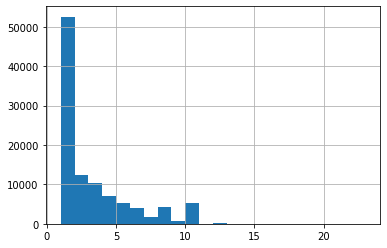

In [123]:
data_payments['payment_installments'].hist(bins=range(1,24))

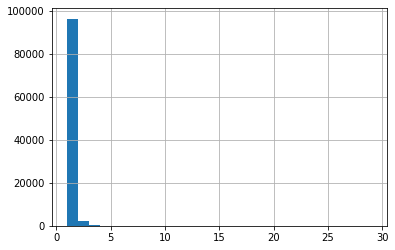

In [124]:
data_payments['order_id'].value_counts().hist(bins=range(1,30))

In [125]:
display(data_payments.loc[data_payments['order_id']=='fa65dad1b0e818e3ccc5cb0e39231352'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


## Commentaires

In [126]:
data_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
print(data_reviews.shape)
display(data_reviews.head())

(100000, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [127]:
data_reviews.drop(labels=['review_comment_title','review_comment_message', 'review_creation_date',
                          'review_answer_timestamp'], axis=1, inplace=True)

Attention : plus de commentaires que de commandes ! Mais néanmoins moins que de le nombre de produits commandés. Le problème réside dans le fait que le lien soit fait par customer id. Faire un groupby préalable par order id.

# Création BDD clients / produits

## Assemblage commandes et clients

In [128]:
BDD_orders = data_orders.merge(right=data_customers, how='left', on='customer_id')
print(BDD_orders.shape)
display(BDD_orders.head())

(99441, 9)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


## Assemblage objets commandés et données produits

In [129]:
BDD_products = data_order_items.merge(right=data_products, how='left', on='product_id')
print(BDD_products.shape)
display(BDD_products.head())

(112650, 6)


,order_id,product_id,seller_id,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,garden_tools


In [130]:
display(BDD_products.loc[BDD_products['order_id']=='1b15974a0141d54e36626dca3fdc731a'])

,order_id,product_id,seller_id,price,freight_value,product_category_name_english
11932,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,computers_accessories
11933,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,computers_accessories
11934,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,computers_accessories
11935,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,computers_accessories
11936,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,computers_accessories
11937,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,computers_accessories
11938,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,computers_accessories
11939,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,computers_accessories
11940,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,computers_accessories
11941,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,computers_accessories


## Assemblage global comandes / produits

Ici on assemble les deux bases de données établies précédemment. On sélectionne unqiuement les commandes livréees.

In [131]:
BDD_customers_products = BDD_products.merge(right=BDD_orders, how='left', on='order_id')
print(BDD_customers_products.shape)
display(BDD_customers_products.head())

(112650, 14)


,order_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


Aperçu de la structure pour un client :

In [132]:
display(BDD_customers_products.loc[BDD_customers_products['customer_unique_id']=='4546caea018ad8c692964e3382debd19'])

,order_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
57297,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1.2,7.89,health_beauty,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
57298,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,health_beauty,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
57299,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,health_beauty,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
57300,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,health_beauty,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
57301,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,health_beauty,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
57302,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,health_beauty,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
57303,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,health_beauty,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
57304,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,health_beauty,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
57305,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,health_beauty,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP
57306,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,health_beauty,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP


In [133]:
BDD_customers_products = BDD_customers_products.loc[BDD_customers_products['order_status']=='delivered']
print(BDD_customers_products.shape)

(110197, 14)


## Sélection de features 

On sélectionne ensuite seulement les features nécessaires : l'id du client, le prix de chaque objet commandé et la catégorie à laquelle il appartient. On retire également les produits commandés dont la catégorie de produits n'est pas connue.

In [134]:
BDD_customers_products_light = BDD_customers_products.loc[:,['customer_unique_id', 'price', 
                                                             'product_category_name_english']]
print(BDD_customers_products_light.shape)
BDD_customers_products_light.dropna(subset=['product_category_name_english'], inplace=True)
print(BDD_customers_products_light.shape)
display(BDD_customers_products_light.head())

(110197, 3)
(108638, 3)


,customer_unique_id,price,product_category_name_english
0,871766c5855e863f6eccc05f988b23cb,58.90,cool_stuff
1,eb28e67c4c0b83846050ddfb8a35d051,239.90,pet_shop
2,3818d81c6709e39d06b2738a8d3a2474,199.00,furniture_decor
3,af861d436cfc08b2c2ddefd0ba074622,12.99,perfumery
4,64b576fb70d441e8f1b2d7d446e483c5,199.90,garden_tools


In [135]:
display(BDD_customers_products_light['customer_unique_id'].value_counts())

c8460e4251689ba205045f3ea17884a1    24
4546caea018ad8c692964e3382debd19    21
c402f431464c72e27330a67f7b94d4fb    20
698e1cf81d01a3d389d96145f7fa6df8    20
0f5ac8d5c31de21d2f25e24be15bbffb    18
                                    ..
b5f8487590dbf8c58d1abb635ff21d08     1
850a172dd946b18ddca4a71627fe32e1     1
1f52629bd64b89ba7fcd967bd59e2b52     1
ca9dde733a9274ed9bea93b8418eaac3     1
b18b4476853080ceabd1f38444edea1f     1
Name: customer_unique_id, Length: 92079, dtype: int64

Exemple de la structure pour un client :

In [136]:
display(BDD_customers_products_light.loc[BDD_customers_products_light['customer_unique_id']=='4546caea018ad8c692964e3382debd19'])

,customer_unique_id,price,product_category_name_english
57297,4546caea018ad8c692964e3382debd19,1.2,health_beauty
57298,4546caea018ad8c692964e3382debd19,1.2,health_beauty
57299,4546caea018ad8c692964e3382debd19,1.2,health_beauty
57300,4546caea018ad8c692964e3382debd19,1.2,health_beauty
57301,4546caea018ad8c692964e3382debd19,1.2,health_beauty
57302,4546caea018ad8c692964e3382debd19,1.2,health_beauty
57303,4546caea018ad8c692964e3382debd19,1.2,health_beauty
57304,4546caea018ad8c692964e3382debd19,1.2,health_beauty
57305,4546caea018ad8c692964e3382debd19,1.2,health_beauty
57306,4546caea018ad8c692964e3382debd19,1.2,health_beauty


## Aggréagation au niveau du client 

En suite on créé une nouvelle variable pour chaque catégorie de produits et l'on aggrège au niveau du client en effectuant la somme des dépenses dans chaque catégorie de produits.

In [137]:
BDD_CP = BDD_customers_products_light.pivot_table(columns='product_category_name_english', values = 'price', 
                                                  index='customer_unique_id', aggfunc=np.sum)
BDD_CP.fillna(value=0, inplace=True)
print(BDD_CP.shape)
display(BDD_CP.head())

(92079, 71)


product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.00,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.99,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.00,0.0,0.0


In [143]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(BDD_CP.loc[['4546caea018ad8c692964e3382debd19'],:])

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4546caea018ad8c692964e3382debd19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Enregistrement du dataset

In [138]:
#BDD_CP.to_csv('BDD_customers_products.csv')